In [1]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
train_data = pd.read_csv("../train.csv")
train_data = train_data.dropna(subset=['gt_25k_p6', 'gt_25k_05_p6', 'md_earn_wne_p10'])

In [3]:
train_data.columns

Index(['INSTNM', 'CITY', 'STABBR', 'PREDDEG', 'CONTROL', 'LOCALE', 'SATVRMID',
       'SATMTMID', 'SATWRMID', 'ACTCMMID', 'ACTENMID', 'ACTMTMID', 'ACTWRMID',
       'SAT_AVG', 'DISTANCEONLY', 'UGDS', 'UGDS_WHITE', 'UGDS_BLACK',
       'UGDS_HISP', 'UGDS_ASIAN', 'UGDS_AIAN', 'UGDS_NHPI', 'UGDS_2MOR',
       'UGDS_NRA', 'UGDS_UNKN', 'PPTUG_EF', 'NPT4_PUB', 'NPT4_PRIV', 'PCTPELL',
       'RET_FT4', 'RET_FTL4', 'RET_PT4', 'RET_PTL4', 'PCTFLOAN', 'UG25abv',
       'GRAD_DEBT_MDN_SUPP', 'GRAD_DEBT_MDN10YR_SUPP', 'RPY_3YR_RT_SUPP',
       'C150_4_POOLED_SUPP', 'C200_L4_POOLED_SUPP', 'md_earn_wne_p10',
       'gt_25k_p6', 'gt_25k_05_p6'],
      dtype='object')

# 1

## a

In [4]:
md_earn_mean = train_data["md_earn_wne_p10"].mean()
gt_25k_mean = train_data["gt_25k_05_p6"].mean()
gt_25k_mode = gt_25k_mean >= .5

In [5]:
gt_25k_mode

True

In [6]:
md_earn_MSE = np.mean([(v - md_earn_mean)**2 for v in train_data["md_earn_wne_p10"].values])
gt_25k_MSE = np.mean([(v - gt_25k_mode)**2 for v in train_data["gt_25k_05_p6"].values])

In [7]:
md_earn_MSE

191640717.99292535

In [8]:
gt_25k_MSE

0.4686660698299015

## b

It's the right loss function. We're just trying to get them right.

## c

In [9]:
train_data['NPT4'] = train_data['NPT4_PUB'].combine_first(train_data['NPT4_PRIV'])
train_data['RET_FT'] = train_data['RET_FT4'].combine_first(train_data['RET_FTL4'])
train_data['RET_PT'] = train_data['RET_PT4'].combine_first(train_data['RET_PTL4'])

In [10]:
predictors = ['CONTROL', 'LOCALE', 'UGDS', 'PCTPELL', 'PCTFLOAN', 'UG25abv', 'PPTUG_EF', 'NPT4', 'RET_FT']
train_data = train_data.dropna(subset=predictors)

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, _ ,_ = train_test_split(train_data, train_data, test_size=0.25)

In [12]:
for col in X_train.columns:
    r = X_train[col].isna().sum()
    print(col, r)

INSTNM 0
CITY 0
STABBR 0
PREDDEG 0
CONTROL 0
LOCALE 0
SATVRMID 2083
SATMTMID 2076
SATWRMID 2371
ACTCMMID 2060
ACTENMID 2158
ACTMTMID 2158
ACTWRMID 2657
SAT_AVG 2017
DISTANCEONLY 0
UGDS 0
UGDS_WHITE 0
UGDS_BLACK 0
UGDS_HISP 0
UGDS_ASIAN 0
UGDS_AIAN 0
UGDS_NHPI 0
UGDS_2MOR 0
UGDS_NRA 0
UGDS_UNKN 0
PPTUG_EF 0
NPT4_PUB 1808
NPT4_PRIV 1042
PCTPELL 0
RET_FT4 1606
RET_FTL4 1244
RET_PT4 2063
RET_PTL4 1850
PCTFLOAN 0
UG25abv 0
GRAD_DEBT_MDN_SUPP 290
GRAD_DEBT_MDN10YR_SUPP 290
RPY_3YR_RT_SUPP 241
C150_4_POOLED_SUPP 1674
C200_L4_POOLED_SUPP 1316
md_earn_wne_p10 0
gt_25k_p6 0
gt_25k_05_p6 0
NPT4 0
RET_FT 0
RET_PT 1063


In [13]:
ols = smf.ols('md_earn_wne_p10 ~ C(CONTROL) + C(LOCALE) + UGDS + PCTPELL + PCTFLOAN + UG25abv + PPTUG_EF', data=X_train).fit()

In [14]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        md_earn_wne_p10   R-squared:                       0.492
Model:                            OLS   Adj. R-squared:                  0.489
Method:                 Least Squares   F-statistic:                     152.2
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:01:42   Log-Likelihood:                -29767.
No. Observations:                2850   AIC:                         5.957e+04
Df Residuals:                    2831   BIC:                         5.969e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept          3.916e+04    773.757     50.615      0.000    3.76e+04    4.07e+04
C(CONTROL)[T.2]    2330.1928    518.756      4.492      0.000    1313.014    3347.372
C(CONTROL)[T.3]   -7286.0466    564.082    -12.917      0.000   -8392.099   -6179.994
C(LOCALE)[T.12.0] -1532.6156    565.502     -2.710      0.007   -2641.452    -423.779
C(LOCALE)[T.13.0] -2314.8373    551.599     -4.197      0.000   -3396.415   -1233.260
C(LOCALE)[T.21.0]  -677.3468    463.835     -1.460      0.144   -1586.835     232.141
C(LOCALE)[T.22.0] -2556.2269    989.962     -2.582      0.010   -4497.348    -615.106
C(LOCALE)[T.23.0] -3611.0909   1184.307     -3.049      0.002   -5933.283   -1288.899
C(LOCALE)[T.31.0] -3779.7798   1212.171     -3.118      0.002   -6156.608   -1402.952
C(LOCALE)[T.32.0] -4134.9093    722.799     -5.721      0.000   -5552.174   -2717.644
C(LOCALE)[T.33.0] -3498.3830    768.058     -4.555      0.000   -5004.393   -1992.373
C(LOCALE)[T.41.0] -2471.9635    768.736     -3.216      0.001   -3979.302    -964.625
C(LOCALE)[T.42.0] -4232.5644   1269.621     -3.334      0.001   -6722.039   -1743.090
C(LOCALE)[T.43.0] -3931.5792   1521.101     -2.585      0.010   -6914.158    -949.000
UGDS                  0.3354      0.033     10.052      0.000       0.270       0.401
PCTPELL           -2.879e+04    974.822    -29.532      0.000   -3.07e+04   -2.69e+04
PCTFLOAN           1.662e+04    711.664     23.360      0.000    1.52e+04     1.8e+04
UG25abv            9753.9745    989.774      9.855      0.000    7813.224    1.17e+04
PPTUG_EF          -7118.6026    823.176     -8.648      0.000   -8732.688   -5504.517
==============================================================================
Omnibus:                      799.027   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3460.887
Skew:                           1.296   Prob(JB):                         0.00
Kurtosis:                       7.736   Cond. No.                     7.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
log = smf.logit('gt_25k_05_p6 ~ C(CONTROL) + C(LOCALE) + UGDS + PCTPELL + PCTFLOAN + UG25abv + PPTUG_EF', data=X_train).fit()

Optimization terminated successfully.
         Current function value: 0.427077
         Iterations 7


In [16]:
log.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           gt_25k_05_p6   No. Observations:                 2850
Model:                          Logit   Df Residuals:                     2831
Method:                           MLE   Df Model:                           18
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:                  0.3836
Time:                        21:01:42   Log-Likelihood:                -1217.2
converged:                       True   LL-Null:                       -1974.6
                                        LLR p-value:                3.036e-311
=====================================================================================
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             0.5384      0.257      2.097      0.036       0.035       1.042
C(CONTROL)[T.2]      -0.5277      0.190     -2.774      0.006      -0.901      -0.155
C(CONTROL)[T.3]      -2.0205      0.193    -10.442      0.000      -2.400      -1.641
C(LOCALE)[T.12.0]    -0.1981      0.185     -1.072      0.284      -0.560       0.164
C(LOCALE)[T.13.0]    -0.4883      0.185     -2.635      0.008      -0.851      -0.125
C(LOCALE)[T.21.0]    -0.1165      0.147     -0.792      0.428      -0.405       0.172
C(LOCALE)[T.22.0]    -0.2621      0.326     -0.803      0.422      -0.902       0.377
C(LOCALE)[T.23.0]    -0.2901      0.409     -0.710      0.478      -1.091       0.511
C(LOCALE)[T.31.0]    -0.0768      0.410     -0.187      0.852      -0.881       0.727
C(LOCALE)[T.32.0]    -0.2931      0.243     -1.204      0.229      -0.770       0.184
C(LOCALE)[T.33.0]    -0.2365      0.247     -0.958      0.338      -0.720       0.247
C(LOCALE)[T.41.0]    -0.1092      0.237     -0.462      0.644      -0.573       0.355
C(LOCALE)[T.42.0]    -1.1203      0.451     -2.486      0.013      -2.003      -0.237
C(LOCALE)[T.43.0]    -1.0511      0.527     -1.996      0.046      -2.083      -0.019
UGDS               9.653e-05   1.51e-05      6.392      0.000    6.69e-05       0.000
PCTPELL              -9.5739      0.463    -20.659      0.000     -10.482      -8.666
PCTFLOAN              7.6369      0.376     20.313      0.000       6.900       8.374
UG25abv               3.2294      0.331      9.768      0.000       2.581       3.877
PPTUG_EF             -0.6105      0.258     -2.364      0.018      -1.117      -0.104
=====================================================================================
"""

In [17]:
def MSE(preds, labels):
    return np.mean([(v - p)**2 for v,p in zip(labels, preds)])

In [18]:
ols_pred = ols.predict(X_test)
log_pred = log.predict(X_test)
ols_MSE = MSE(X_test["md_earn_wne_p10"].values,ols_pred)
log_MSE = MSE(X_test["gt_25k_05_p6"].values,log_pred)

In [19]:
ols_MSE

64256933.3713416

In [20]:
log_MSE

0.13848912044044465

MUCH BETTER!!!!!

# 2

In [36]:
def fitmodel(S,data,response,model='ols'):
    if model == 'ols':
        return smf.ols(response+' ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()
    elif model == 'logit':
        return smf.logit(response+' ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit()
    return None
def CV_MSE(response, features, data, folds=20):
    idxs = np.arange(len(data))/int(np.ceil(len(data)/float(folds)))
    idxs = idxs.astype(int)
    
    fs = max(idxs)+1
    mses = np.zeros(fs)
    for f in range(fs):
        mses[f] = ((data[idxs==f][response]
            -
            fitmodel(features,data[idxs!=f],response).predict(data[idxs==f]))**2).mean()
    return mses.mean(), mses.std(ddof=1)/np.sqrt(fs)
def PredError(model, df):
    return ((df['quality'] - model.predict(df))**2).mean()
def rsquaredCV(response, features, data):
    return 1-CV_MSE(response,features,data)[0] / data[response].var()

In [74]:
def fitmodel_regularized(S,data,response,l,L1,model='ols'):
    if model == 'ols':
        return smf.ols(response+' ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit_regularized(alpha=l,L1_wt=L1)
    elif model == 'logit':
        return smf.logit(response+' ~ '+('+'.join(S) if len(S)>0 else '1'), data=data).fit_regularized(alpha=l,L1_wt=L1)
    return None

In [37]:
def getaic(lm):
    return -lm.aic
mycriterion = getaic
## forward stepwise
def fwdSW(feat, data, response, model):
    Sfwd = set()
    features = set(feat)
    
    while len(Sfwd)<len(features):
        f = max(features - Sfwd, key = lambda f: mycriterion(fitmodel(Sfwd.union({f}),data,response, model)))
        after = mycriterion(fitmodel(Sfwd.union({f}),data,response, model))
        before = mycriterion(fitmodel(Sfwd,data,response,model))
        if after > before:
            Sfwd = Sfwd.union({f})
        else:
            break
    return Sfwd

def bckwdSW(feat, data, response,model):
    Sbwd = set(feat)
    
    while len(Sbwd)>0:
        f = max(Sbwd, key = lambda f: mycriterion(fitmodel(Sbwd-{f},data,response,model)))
        after = mycriterion(fitmodel(Sbwd-{f},data,response,model))
        before = mycriterion(fitmodel(Sbwd,data,response,model))
        if after > before:
            Sbwd = Sbwd-{f}
        else:
            break
    return Sbwd

def SWboth_calc(features, data, response,model):
    Sfwd = fwdSW(features, data, response,model)
    Sbwd = bckwdSW(features, data, response,model)
    Sboth = Sfwd if mycriterion(fitmodel(Sfwd,data,response,model)) > mycriterion(fitmodel(Sbwd,data,response,model)) else Sbwd
    
    return Sboth

def SWboth(Sfwd, Sbwd,data, response):
    Sboth = Sfwd if mycriterion(fitmodel(Sfwd,data,response)) > mycriterion(fitmodel(Sbwd,data,response)) else Sbwd 
    return Sboth

## Feature Selection

In [38]:
#covariates = list(set(X_train.columns)-{'md_earn_wne_p10', 'gt_25k_05_p6', 'gt_25k_p6', 'INSTNM'})
covariates = ['C(CONTROL)', 'C(LOCALE)', 'UGDS', 'PCTPELL', 'PCTFLOAN', 'UG25abv', 'PPTUG_EF', 'NPT4', 'RET_FT']
covariates = set(covariates).union({'UGDS_WHITE', 'UGDS_BLACK', 'UGDS_UNKN', 'DISTANCEONLY', 'UGDS_ASIAN', 'UGDS_HISP', 'UGDS_AIAN'})

### Regression

In [39]:
S_ols = SWboth_calc(covariates, X_train, 'md_earn_wne_p10', 'ols')
S_ols

{'C(CONTROL)',
 'DISTANCEONLY',
 'NPT4',
 'PCTFLOAN',
 'PCTPELL',
 'PPTUG_EF',
 'RET_FT',
 'UG25abv',
 'UGDS',
 'UGDS_AIAN',
 'UGDS_ASIAN',
 'UGDS_BLACK',
 'UGDS_HISP',
 'UGDS_WHITE'}

In [40]:
selected_ols = smf.ols('md_earn_wne_p10 ~ ' + '+ '.join(S_ols), data=X_train).fit()

In [41]:
selected_ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        md_earn_wne_p10   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     237.5
Date:                Mon, 29 Apr 2019   Prob (F-statistic):               0.00
Time:                        21:10:27   Log-Likelihood:                -29572.
No. Observations:                2850   AIC:                         5.918e+04
Df Residuals:                    2834   BIC:                         5.927e+04
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept         4.07e+04   1600.614     25.427      0.000    3.76e+04    4.38e+04
C(CONTROL)[T.2] -1267.2109    522.468     -2.425      0.015   -2291.667    -242.754
C(CONTROL)[T.3]  -1.08e+04    547.356    -19.732      0.000   -1.19e+04   -9727.353
UGDS_AIAN       -1.595e+04   2607.281     -6.116      0.000   -2.11e+04   -1.08e+04
DISTANCEONLY     7873.0390   3922.806      2.007      0.045     181.195    1.56e+04
PCTFLOAN         1.276e+04    823.104     15.505      0.000    1.11e+04    1.44e+04
NPT4                0.4173      0.029     14.150      0.000       0.359       0.475
RET_FT           1972.6946    991.444      1.990      0.047      28.670    3916.719
PCTPELL         -2.235e+04   1121.713    -19.927      0.000   -2.46e+04   -2.02e+04
UGDS_WHITE      -1.308e+04   1375.906     -9.508      0.000   -1.58e+04   -1.04e+04
UGDS_ASIAN       6814.3279   2917.756      2.335      0.020    1093.188    1.25e+04
UG25abv          1.013e+04    938.727     10.787      0.000    8285.012     1.2e+04
UGDS_HISP       -9647.2091   1516.922     -6.360      0.000   -1.26e+04   -6672.826
PPTUG_EF        -4939.7324    789.331     -6.258      0.000   -6487.454   -3392.011
UGDS_BLACK      -1.204e+04   1454.047     -8.280      0.000   -1.49e+04   -9188.013
UGDS                0.2685      0.030      8.816      0.000       0.209       0.328
==============================================================================
Omnibus:                      658.115   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3053.488
Skew:                           1.034   Prob(JB):                         0.00
Kurtosis:                       7.630   Cond. No.                     4.76e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.76e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Classification

In [44]:
S_logit = SWboth_calc(covariates, X_train, 'gt_25k_05_p6', 'logit')
S_logit

Optimization terminated successfully.
         Current function value: 0.675377
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.654555
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.684267
         Iterations 4
Optimization terminated successfully.
         Current function value: 0.683797
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.622533
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.688813
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.692679
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.654816
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.596197
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.667528
  

Optimization terminated successfully.
         Current function value: 0.430579
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.422394
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.430607
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.429603
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.425531
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.428061
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.429483
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.429717
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.426541
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.425175
  

Optimization terminated successfully.
         Current function value: 0.408656
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.408599
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.414985
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.468433
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.408563
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.408492
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.409138
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.408960
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.425977
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.408672
  

Optimization terminated successfully.
         Current function value: 0.409353
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.409353
         Iterations 7
Optimization terminated successfully.
         Current function value: 0.409353
         Iterations 7


{'C(CONTROL)',
 'NPT4',
 'PCTFLOAN',
 'PCTPELL',
 'PPTUG_EF',
 'UG25abv',
 'UGDS',
 'UGDS_ASIAN',
 'UGDS_BLACK',
 'UGDS_UNKN'}

In [45]:
selected_logit = smf.logit('gt_25k_05_p6 ~ ' + '+ '.join(S_logit), data=X_train).fit()

Optimization terminated successfully.
         Current function value: 0.409353
         Iterations 7


In [46]:
selected_logit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           gt_25k_05_p6   No. Observations:                 2850
Model:                          Logit   Df Residuals:                     2838
Method:                           MLE   Df Model:                           11
Date:                Mon, 29 Apr 2019   Pseudo R-squ.:                  0.4092
Time:                        21:13:19   Log-Likelihood:                -1166.7
converged:                       True   LL-Null:                       -1974.6
                                        LLR p-value:                     0.000
===================================================================================
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7281      0.231     -3.146      0.002      -1.182      -0.275
C(CONTROL)[T.2]    -1.0839      0.203     -5.328      0.000      -1.483      -0.685
C(CONTROL)[T.3]    -2.7537      0.207    -13.309      0.000      -3.159      -2.348
PCTFLOAN            6.8652      0.395     17.401      0.000       6.092       7.638
NPT4             7.036e-05   1.13e-05      6.201      0.000    4.81e-05    9.26e-05
PCTPELL            -8.0656      0.481    -16.751      0.000      -9.009      -7.122
UGDS_ASIAN          4.1624      0.880      4.731      0.000       2.438       5.887
UG25abv             3.2972      0.339      9.714      0.000       2.632       3.962
PPTUG_EF           -0.4473      0.264     -1.693      0.091      -0.965       0.071
UGDS_BLACK         -1.1967      0.278     -4.300      0.000      -1.742      -0.651
UGDS             8.384e-05   1.43e-05      5.869      0.000    5.58e-05       0.000
UGDS_UNKN           2.1501      0.494      4.354      0.000       1.182       3.118
===================================================================================
"""

### Evaluation after Feature Selection

In [49]:
selected_ols_pred = selected_ols.predict(X_test)
selected_logit_pred = selected_logit.predict(X_test)
selected_ols_MSE = MSE(X_test["md_earn_wne_p10"].values,selected_ols_pred)
selected_log_MSE = MSE(X_test["gt_25k_05_p6"].values,selected_logit_pred)

In [50]:
selected_ols_MSE

59423824.67627946

In [51]:
selected_log_MSE

0.13581442066984845

## Regularization

In [85]:
L1s, lambdas = [.05*x for x in range(21)], [.5*x for x in range(21)]

In [86]:
L1_best, lambda_best, model_best = -1, -1, None
lambda_MSEs = []
min_error = np.float('inf')
for L1 in L1s:
    for l in lambdas:
        model = fitmodel_regularized(S_ols, X_train, 'md_earn_wne_p10', l, L1, 'ols')
        preds = model.predict(X_test)
        error = MSE(X_test['md_earn_wne_p10'].values, preds)
        if L1 == 0.0:
            lambda_MSEs.append(error)
        if error < min_error:
            min_error = error
            L1_best = L1
            lambda_best = l
            model_best = model

In [87]:
L1_best, lambda_best

(0.0, 0.0)

In [88]:
min_error

59423824.676279455

In [89]:
model_best.summary()

In [90]:
import matplotlib.pyplot as plt

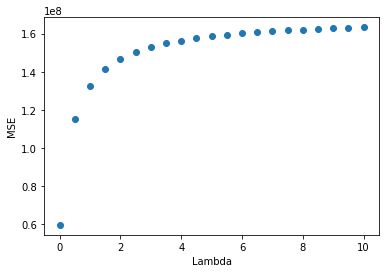

In [91]:
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.scatter(lambdas, lambda_MSEs)

In [92]:
L1_best, lambda_best, model_best = -1, -1, None
lambda_MSEs = []
min_error = np.float('inf')
for L1 in L1s:
    for l in lambdas:
        model = fitmodel_regularized(S_logit, X_train, 'gt_25k_05_p6', l, L1, 'logit')
        preds = model.predict(X_test)
        error = MSE(X_test['gt_25k_05_p6'].values, preds)
        if L1 == 0.0:
            lambda_MSEs.append(error)
        if error < min_error:
            min_error = error
            L1_best = L1
            lambda_best = l
            model_best = model

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.40935276362066847
            Iterations: 87
            Function evaluations: 103
            Gradient evaluations: 87
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4146287905822922
            Iterations: 164
            Function evaluations: 179
            Gradient evaluations: 164
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.41967512126293666
            Iterations: 148
            Function evaluations: 163
            Gradient evaluations: 148
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.42450189292

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.43352740536481904
            Iterations: 132
            Function evaluations: 147
            Gradient evaluations: 132
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4377373284751743
            Iterations: 125
            Function evaluations: 140
            Gradient evaluations: 125
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4417503861039226
            Iterations: 121
            Function evaluations: 136
            Gradient evaluations: 121
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4559063367780923
            Iterations: 94
            Function evaluations: 109
            Gradient evaluations: 94
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4590812238502639
            Iterations: 89
            Function evaluations: 104
            Gradient evaluations: 89
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4621588139892893
            Iterations: 88
            Function evaluations: 103
            Gradient evaluations: 88
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.46514467753029326

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4762097973073976
            Iterations: 90
            Function evaluations: 105
            Gradient evaluations: 90
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4787651398618359
            Iterations: 87
            Function evaluations: 102
            Gradient evaluations: 87
QC check did not pass for 2 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            C

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4146287905822922
            Iterations: 164
            Function evaluations: 179
            Gradient evaluations: 164
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.41967512126293666
            Iterations: 148
            Function evaluations: 163
            Gradient evaluations: 148
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4245018929294695
            Iterations: 135
            Function evaluations: 150
            Gradient evaluations: 135
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4291171880

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4377373284751743
            Iterations: 125
            Function evaluations: 140
            Gradient evaluations: 125
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4417503861039226
            Iterations: 121
            Function evaluations: 136
            Gradient evaluations: 121
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
         

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4559063367780923
            Iterations: 94
            Function evaluations: 109
            Gradient evaluations: 94
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4590812238502639
            Iterations: 89
            Function evaluations: 104
            Gradient evaluations: 89
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4621588139892893
            Iterations: 88
            Function evaluations: 103
            Gradient evaluations: 88
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.46514467753029326

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4762097973073976
            Iterations: 90
            Function evaluations: 105
            Gradient evaluations: 90
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4787651398618359
            Iterations: 87
            Function evaluations: 102
            Gradient evaluations: 87
QC check did not pass for 2 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            C

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.40935276362066847
            Iterations: 87
            Function evaluations: 103
            Gradient evaluations: 87
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4146287905822922
            Iterations: 164
            Function evaluations: 179
            Gradient evaluations: 164
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.41967512126293666
            Iterations: 148
            Function evaluations: 163
            Gradient evaluations: 148
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.42450189292

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4417503861039226
            Iterations: 121
            Function evaluations: 136
            Gradient evaluations: 121
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4455688563853951
            Iterations: 125
            Function evaluations: 140
            Gradient evaluations: 125
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4491941510872261
            Iterations: 125
            Function evaluations: 140
            Gradient evaluations: 125
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.45262724097

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4590812238502639
            Iterations: 89
            Function evaluations: 104
            Gradient evaluations: 89
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4621588139892893
            Iterations: 88
            Function evaluations: 103
            Gradient evaluations: 88
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.46514467753029326
            Iterations: 96
            Function evaluations: 111
            Gradient evaluations: 96
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4680408945262225

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.470849314770511
            Iterations: 90
            Function evaluations: 105
            Gradient evaluations: 90
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4735717204981331
            Iterations: 90
            Function evaluations: 106
            Gradient evaluations: 90
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4762097973073976
            Iterations: 90
            Function evaluations: 105
            Gradient evaluations: 90
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decrea

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.40935276362066847
            Iterations: 87
            Function evaluations: 103
            Gradient evaluations: 87
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4146287905822922
            Iterations: 164
            Function evaluations: 179
            Gradient evaluations: 164
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.41967512126293666
            Iterations: 148
            Function evaluations: 163
            Gradient evaluations: 148
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.42450189292

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4377373284751743
            Iterations: 125
            Function evaluations: 140
            Gradient evaluations: 125
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4417503861039226
            Iterations: 121
            Function evaluations: 136
            Gradient evaluations: 121
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
         

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.45262724097685464
            Iterations: 107
            Function evaluations: 122
            Gradient evaluations: 107
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4559063367780923
            Iterations: 94
            Function evaluations: 109
            Gradient evaluations: 94
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4590812238502639
            Iterations: 89
            Function evaluations: 104
            Gradient evaluations: 89
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, de

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4680408945262225
            Iterations: 93
            Function evaluations: 108
            Gradient evaluations: 93
QC check did not pass for 2 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.470849314770511
            Iterations: 90
            Function evaluations: 105
            Gradient evaluations: 90
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4735717204981331
            Iterations: 90
            Function evaluations: 106
            Gradient evaluations: 90
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decrea

Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.40935276362066847
            Iterations: 87
            Function evaluations: 103
            Gradient evaluations: 87
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.4146287905822922
            Iterations: 164
            Function evaluations: 179
            Gradient evaluations: 164
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.41967512126293666
            Iterations: 148
            Function evaluations: 163
            Gradient evaluations: 148
QC check did not pass for 1 out of 12 parameters
Try increasing solver accuracy or number of iterations, decreasing alpha, or switch solvers
Could not trim params automatically due to failed QC check.  Trimming using trim_mode == 'size' will still work.
Optimization terminated successfully.    (Exit mode 0)
            Current function value: 0.42450189292

In [93]:
L1_best, lambda_best

(0.0, 1.0)

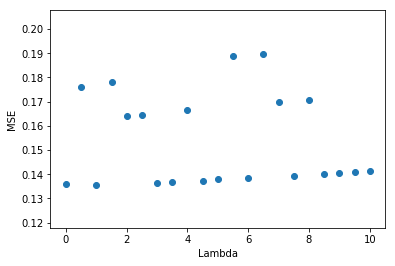

In [94]:
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.scatter(lambdas, lambda_MSEs)

In [95]:
min_error

0.13574577836312737

## Random Forest

In [171]:
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

In [172]:
feat_choice, num_trees = ['auto','sqrt','log2'], [10*x for x in range(1, 21)]

In [173]:
feat_choice

['auto', 'sqrt', 'log2']

In [174]:
rf_covariates = (set(covariates)-{'C(LOCALE)', 'C(CONTROL)'})
X_train_features, X_test_features = X_train[list(rf_covariates)], X_test[list(rf_covariates)]

In [175]:
rf_reg = RandomForestRegressor().fit(X_train_features, X_train['md_earn_wne_p10'])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [176]:
MSE(rf_reg.predict(X_test_features), X_test['md_earn_wne_p10'])

38110940.84210526

In [177]:
feat_best, num_trees_best, model_best = -1, -1, None
min_error = np.float('inf')
MSEs = []
for f in feat_choice:
    for num_t in num_trees:
        model = RandomForestRegressor(max_features=f, n_estimators=num_t).fit(X_train_features, X_train['md_earn_wne_p10'])
        preds = model.predict(X_test_features)
        error = MSE(X_test['md_earn_wne_p10'].values, preds)
        if f == 'auto':
            MSEs.append(error)
        if error < min_error:
            min_error = error
            feat_best = f
            num_trees_best = num_t
            model_best = model

In [178]:
feat_best, num_trees_best

('sqrt', 100)

In [179]:
MSE(model_best.predict(X_test_features), X_test['md_earn_wne_p10'])

34240799.983157896

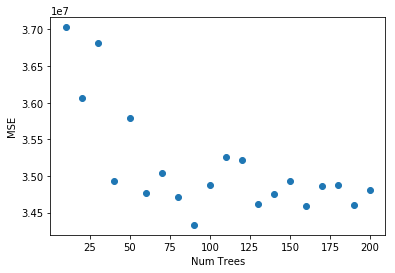

In [180]:
plt.xlabel("Num Trees")
plt.ylabel("MSE")
plt.scatter(num_trees, MSEs)

In [181]:
rf_clf = RandomForestClassifier().fit(X_train_features, X_train['gt_25k_05_p6'])
MSE(rf_clf.predict(X_test_features), X_test['gt_25k_05_p6'])

/Library/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.1736842105263158

In [182]:
feat_best, num_trees_best, model_best = -1, -1, None
min_error = np.float('inf')
MSEs = []
for f in feat_choice:
    for num_t in num_trees:
        model = RandomForestClassifier(max_features=f, n_estimators=num_t).fit(X_train_features, X_train['gt_25k_05_p6'])
        preds = model.predict(X_test_features)
        error = MSE(X_test['gt_25k_05_p6'].values, preds)
        if f == 'auto':
            MSEs.append(error)
        if error < min_error:
            min_error = error
            feat_best = f
            num_trees_best = num_t
            model_best = model

In [183]:
feat_best, num_trees_best

('sqrt', 30)

In [184]:
MSE(model_best.predict(X_test_features), X_test['gt_25k_05_p6'])

0.1431578947368421

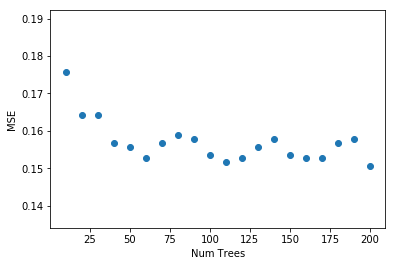

In [185]:
plt.xlabel("Num Trees")
plt.ylabel("MSE")
plt.scatter(num_trees, MSEs)

In [198]:
from sklearn.model_selection import GridSearchCV

In [199]:
parameters = {'n_estimators': num_trees, 'max_features': feat_choice}
grid_reg = GridSearchCV(RandomForestRegressor(), parameters, cv=5)
grid_reg.fit(X_train_features, X_train['md_earn_wne_p10'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [200]:
MSE(grid_reg.predict(X_test_features), X_test['md_earn_wne_p10'])

34544758.70661082

In [201]:
grid_reg.best_estimator_

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=170, n_jobs=None,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [202]:
parameters = {'n_estimators': num_trees, 'max_features': feat_choice}
grid_clf = GridSearchCV(RandomForestClassifier(), parameters, cv=5)
grid_clf.fit(X_train_features, X_train['gt_25k_05_p6'])

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200], 'max_features': ['auto', 'sqrt', 'log2']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [203]:
MSE(grid_clf.predict(X_test_features), X_test['gt_25k_05_p6'])

0.15157894736842106

In [204]:
grid_clf.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=70, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)